In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print("Size of Train: {}".format(x_train.shape))
print("Size of Test: {}".format(x_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Size of Train: (50000, 32, 32, 3)
Size of Test: (10000, 32, 32, 3)


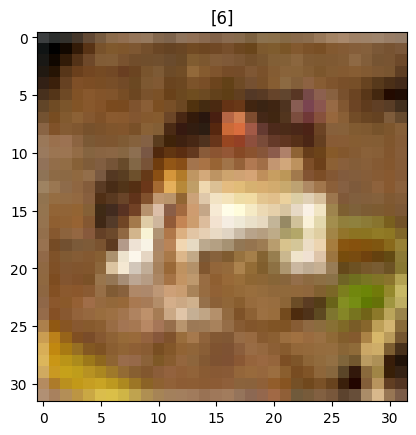

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(y_train[0])
plt.show()

In [3]:
import numpy as np  #-->etiketlemelerini gösterdik
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train, 10)
y_test=to_categorical(y_test, 10) #-->encoding yapısı


from sklearn.model_selection import train_test_split, KFold  #-->dogrulama veri yapısını alıyoruz

x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.2, random_state=0)

row,column,layer=x_train.shape[1:]
print(row,column,layer)


32 32 3


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



def modelkur():

  model=Sequential()

  model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(row,column,layer), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())

  model.add(Dense(64, activation="relu"))
  model.add(Dense(10, activation="softmax"))

  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

  return model


all_train_loss=[]
all_train_acc=[]
all_val_loss=[]
all_val_acc=[]
all_test_loss=[]
all_test_acc=[]


kfold=KFold(n_splits=5, shuffle=True, random_state=42)


for i,j in kfold.split(x_train, y_train):
  x_train_fold=x_train[i]
  y_train_fold=y_train[i]
  x_val_fold=x_train[j]
  y_val_fold=y_train[j]

  model=modelkur()
  output=model.fit(x_train, y_train, validation_data=(x_val_fold, y_val_fold), epochs=3, batch_size=1024, verbose=0)

  train_loss, train_acc=model.evaluate(x_train_fold, y_train_fold, verbose=0)
  all_train_loss.append(train_loss)
  all_train_acc.append(train_acc)


  val_loss, val_acc=model.evaluate(x_val_fold, y_val_fold, verbose=0)
  all_val_loss.append(val_loss)
  all_val_acc.append(val_acc)


  test_loss, test_acc=model.evaluate(x_test, y_test, verbose=0)
  all_test_loss.append(test_loss)
  all_test_acc.append(test_acc)



print("Average Training Loss: {}".format(np.mean(all_train_loss)))
print("Average Training Accuracy: {}".format(np.mean(all_train_acc)))
print("Average Validation Loss: {}".format(np.mean(all_val_loss)))
print("Average Validation Accuracy: {}".format(np.mean(all_val_acc)))
print("Average Test Loss: {}".format(np.mean(all_test_loss)))
print("Average Test Accuracy: {}".format(np.mean(all_test_acc)))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Average Training Loss: 1.4998383522033691
Average Training Accuracy: 0.46699374318122866
Average Validation Loss: 1.4978208780288695
Average Validation Accuracy: 0.468450003862381
Average Test Loss: 1.5006290435791017
Average Test Accuracy: 0.46425999999046325
